In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sinus(x,a,b,c):
    return a*np.sin(b*x+c)

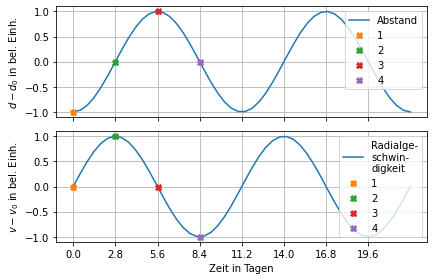

In [3]:
T=11.2
nu = 1/T
omega= 2*np.pi*nu
n = 2
marker_lab = np.arange(4)/4
markers    = T*marker_lab
ticks      = T*np.arange(4*n)/4
ylab = [r"$d-d_0$"+" in bel. Einh.",r"$v-v_0$"+" in bel. Einh."]
 
ts = np.linspace(0,T*n)

fig,ax = plt.subplots(2,1,sharex= "col")

ax[0].plot(ts,sinus(ts,-1,omega,np.pi/2),label="Abstand")

ax[1].plot(ts,sinus(ts,1,omega,0),label="Radialge-\nschwin-\ndigkeit")
for i in range(len(marker_lab)):
    ax[0].plot(markers[i],sinus(markers[i],-1,omega,np.pi/2),"X",label=str(i+1))
    ax[1].plot(markers[i],sinus(markers[i],1,omega,0),"X",label=str(i+1))
ax[1].set_xlabel("Zeit in Tagen")
for i in [0,1]:
    ax[i].legend(loc=1)
    ax[i].set_xticks(ticks)
    ax[i].set_ylabel(ylab[i])
    ax[i].grid()
plt.tight_layout()
plt.savefig("Bilder/radial.jpg", dpi=300)

# Planck'sches Strahlungsgesetz

In [143]:
def L(nu,T):
    """Die Frequenz nu bitte in 1/s eingeben. Temperatur T in Kelvin."""
    h = 6.6261e-34
    c = 2.9979e8
    k = 1.3803e-23
   
    
    return 2*h*nu**3/c**2*1/(np.exp(h*nu/(k*T))-1)

def L_lamb(lamb,T):
    """Wellenlänge in Metern, Temperatur in Kelvin"""
    h = 6.6261e-34
    c = 2.9979e8
    k = 1.3803e-23
    lamb = lamb*1e-9
    
    return 2*h*c**2/(lamb**5) * 1/(np.exp(h*c/(k*lamb*T))-1)
    
    
def L_rj(lamb,T):
    c = 2.9979e8
    k = 1.3803e-23
    pi = np.pi
    lamb = lamb*1e-9
    
    return c/(lamb**4)*k*T

D:\Programme\Anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
D:\Programme\Anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
D:\Programme\Anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
D:\Programme\Anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
D:\Programme\Anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
D:\Programme\Anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


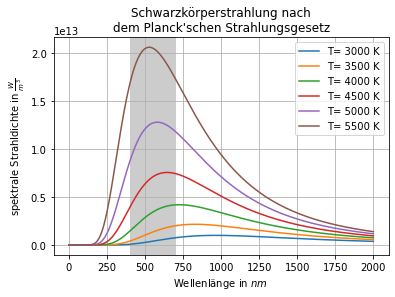

In [145]:
lambdas = np.linspace(1e-2,2e3,500)
temps = 100*np.arange(30,60,step=5)


fig,ax = plt.subplots()
for t in temps:
    ax.plot(lambdas, L_lamb(lambdas,t), label ="T= {} K".format(t))
#ax.set_ylim(0,3e13)
#ax.plot(lambdas, L_rj(lambdas, 5500) , label ="RJ")
ax.legend()
ax.set_xlabel(r"Wellenlänge in $n m$ ")
ax.set_ylabel(r"spektrale Strahldichte in $\frac{W}{m^3}$")
ax.set_title("Schwarzkörperstrahlung nach\ndem Planck'schen Strahlungsgesetz")
ax.axvspan(400,700, facecolor = "grey", alpha = 0.4, label="sichtbares Licht")
ax.grid()
plt.savefig("Bilder/Planck.jpg", dpi=300)
